پروژه داده کاوی

مرجان سهرابی

In [92]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc



1.   فراخوانی داده‌ها


In [48]:
# Read data
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("heartDisease.csv")

Saving heartDisease.csv to heartDisease (4).csv


2. تعداد مشاهدات و تعداد متغیرها

In [49]:
# Get the number of rows and columns
num_rows, num_columns = data.shape

print(f'Number of observations (rows): {num_rows}')
print(f'Number of variables (columns): {num_columns}')

Number of observations (rows): 982
Number of variables (columns): 11


در این فایل داده تعداد 982 مشاهده و 10 متغیر وجود دارد. (یک ستون آیدی مشاهدات است که جزو متغیرها حساب نمی‌شود.)

3. بررسی وجود مشاهدات تکراری

In [50]:
# Check for duplicates
duplicated_rows = data.duplicated()

# Print out the duplicated rows
print(f'Number of duplicated rows: {duplicated_rows.sum()}')
print('Duplicated rows:')
print(data[duplicated_rows])


Number of duplicated rows: 0
Duplicated rows:
Empty DataFrame
Columns: [Unnamed: 0, Age, Sex, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, Angina, HeartPeakReading, HeartDisease]
Index: []


4. بررسی متناسب بودن جنس متغیرها

In [77]:
# Display first few rows
data.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Angina,HeartPeakReading,HeartDisease
0,40.000000,1,140.000000,289,0,1,172.000000,0,0.0,0
1,49.000000,0,132.112102,180,0,1,156.000000,0,1.0,1
2,37.000000,1,130.000000,283,0,1,98.000000,0,0.0,0
3,53.559259,0,138.000000,214,0,1,108.000000,1,1.5,1
4,54.000000,1,132.112102,195,0,1,122.000000,0,0.0,0
5,39.000000,1,120.000000,339,0,1,170.000000,0,0.0,0
6,45.000000,0,130.000000,237,0,1,170.000000,0,0.0,0
7,54.000000,1,110.000000,208,0,1,137.053597,0,0.0,0
8,37.000000,1,140.000000,207,0,1,130.000000,1,1.5,1
9,48.000000,0,120.000000,284,0,1,120.000000,0,0.0,0


In [52]:
# Remove the first column(ID column)
data = data.drop(data.columns[0], axis=1)

In [53]:
# Remove comma and # in RestingBP column
data['RestingBP'] = data['RestingBP'].str.replace(',', '').str.replace('#', '')

In [54]:
# Convert Farsi numbers to English
farsi_to_english = str.maketrans('۰۱۲۳۴۵۶۷۸۹', '0123456789')

# Function to convert Farsi numbers to English
def convert_farsi_to_english(farsi_str):
    if isinstance(farsi_str, str):  # Check if the value is a string
        return farsi_str.translate(farsi_to_english)
    else:
        return farsi_str

# Convert the Age column from Farsi numbers to English numbers
data['Age'] = data['Age'].apply(convert_farsi_to_english)


In [56]:
# Display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               950 non-null    object 
 1   Sex               925 non-null    object 
 2   RestingBP         982 non-null    object 
 3   Cholesterol       982 non-null    int64  
 4   FastingBS         849 non-null    float64
 5   RestingECG        832 non-null    object 
 6   MaxHR             833 non-null    float64
 7   Angina            944 non-null    object 
 8   HeartPeakReading  899 non-null    float64
 9   HeartDisease      841 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 76.8+ KB


In [82]:
# Display basic statistics
data.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Angina,HeartPeakReading,HeartDisease
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000
mean,53.559259,0.799049,132.112102,199.189061,0.209275,0.982164,137.053597,0.382878,0.888975,0.560048
std,9.262293,0.400950,17.705331,109.120242,0.407033,0.569808,23.728423,0.486378,1.028994,0.496677
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.000000,0.000000
25%,48.000000,1.000000,120.000000,173.000000,0.000000,1.000000,122.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,1.000000,137.053597,0.000000,0.888975,1.000000
75%,60.000000,1.000000,140.000000,265.000000,0.000000,1.000000,153.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [57]:
# Changing data type
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Sex'] = data['Sex'].astype('category')
data['RestingBP'] = pd.to_numeric(data['RestingBP'], errors='coerce')
data['FastingBS'] = data['FastingBS'].astype('category')
data['RestingECG'] = data['RestingECG'].astype('category')
data['Angina'] = data['Angina'].astype('category')
data['HeartDisease'] = data['HeartDisease'].astype('category')


In [58]:
# Unique values of each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f'Column: {column}')
    print(f'Unique values: {unique_values}')
    print('-' * 50)

Column: Age
Unique values: [40. 49. 37. nan 54. 39. 45. 48. 58. 42. 38. 43. 60. 36. 44. 53. 52. 51.
 56. 41. 32. 65. 35. 59. 50. 47. 31. 46. 57. 55. 63. 66. 34. 33. 61. 29.
 62. 28. 30. 74. 68. 72. 64. 69. 67. 73. 70. 77. 75. 76. 71.]
--------------------------------------------------
Column: Sex
Unique values: [NaN, 'F', 'M']
Categories (2, object): ['F', 'M']
--------------------------------------------------
Column: RestingBP
Unique values: [140.  nan 130. 138. 120. 110. 136. 115. 100. 124. 113. 125. 145. 150.
 112. 160. 132. 170. 142. 118. 190. 135. 108. 155. 128. 180. 106.  92.
 200. 122.  98. 105. 133.  95.  80. 137. 185. 126. 152. 116.   0. 144.
 154. 134. 104. 139. 131. 146. 158. 123. 102.  96. 143. 172. 141. 156.
 114. 127. 101. 174.  94. 148. 178. 165. 117. 192. 129. 164.]
--------------------------------------------------
Column: Cholesterol
Unique values: [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 22

5. نرخ داده‌های گمشده

In [59]:
# Missing values rate
print(data.isnull().mean() * 100)

Age                  3.258656
Sex                  5.804481
RestingBP            6.415479
Cholesterol          0.000000
FastingBS           13.543788
RestingECG          15.274949
MaxHR               15.173116
Angina               3.869654
HeartPeakReading     8.452138
HeartDisease        14.358452
dtype: float64


In [71]:
# The number of missing
print(data.isnull().sum())

Age                 0
Sex                 0
RestingBP           0
Cholesterol         0
FastingBS           0
RestingECG          0
MaxHR               0
Angina              0
HeartPeakReading    0
HeartDisease        0
dtype: int64


6. بررسی داده‌های گمشده

In [62]:
# Drop missing values in target column
data = data.dropna(subset=['HeartDisease'])

In [67]:
# Replace missing values ​​with averages in numeric columns

# Identify numeric columns (excluding categorical columns)
numeric_columns = data.select_dtypes(include=['number']).columns

# Calculate means for numeric columns excluding NaNs
column_means = data[numeric_columns].mean(skipna=True)

# Replace NaN values with mean for each numeric column
data[numeric_columns] = data[numeric_columns].fillna(column_means)

In [70]:
# Identify categorical columns (excluding numeric columns)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Calculate mode for each categorical column
column_modes = data[categorical_columns].mode().iloc[0]  # Take the first mode (in case of multiple)

# Replace NaN values with mode for each categorical column
data[categorical_columns] = data[categorical_columns].fillna(column_modes)

مقادیر گمشده در ستون هدف حذف گردید. به جهت زیاد بودن تعداد مقادیر گمشده (حدود 60 درصد داده‌ها) مقادیر گمشده در ستون‌های عددی با میانگین ستون جایگزین شد. مقادیر گمشده در ستون‌های طبقه‌بندی شده با مد آن ستون جایگزین شد.

7. نسبت متغیر پاسخ

In [72]:
response_distribution = data['HeartDisease'].value_counts(normalize=True)
print("Response variable distribution:")
print(response_distribution)

Response variable distribution:
HeartDisease
1.0    0.560048
0.0    0.439952
Name: proportion, dtype: float64


نسبت متغیر پاسخ در توازن قرار دارد.

8. تقسیم داده‌ها به دسته آموزشی و آزمایشی

In [76]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [78]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

9. برازش مدل‌ها

9.1 درخت تصمیم

In [79]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.7393364928909952
Confusion Matrix:
 [[64 29]
 [26 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70        93
           1       0.76      0.78      0.77       118

    accuracy                           0.74       211
   macro avg       0.74      0.73      0.73       211
weighted avg       0.74      0.74      0.74       211



9.2 جنگل تصادفی

In [86]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.8246445497630331
Confusion Matrix:
 [[ 69  24]
 [ 13 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79        93
           1       0.81      0.89      0.85       118

    accuracy                           0.82       211
   macro avg       0.83      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211



9.3 بردار ماشین پشتیبان

In [95]:
svm = SVC(probability=True,random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine
Accuracy: 0.8104265402843602
Confusion Matrix:
 [[72 21]
 [19 99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        93
           1       0.82      0.84      0.83       118

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211



9.4 رگرسیون لوژستیک

In [89]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.8009478672985783
Confusion Matrix:
 [[72 21]
 [21 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        93
           1       0.82      0.82      0.82       118

    accuracy                           0.80       211
   macro avg       0.80      0.80      0.80       211
weighted avg       0.80      0.80      0.80       211



9.5 کا-نزدیکترین همسایگی

In [90]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors
Accuracy: 0.7725118483412322
Confusion Matrix:
 [[70 23]
 [25 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74        93
           1       0.80      0.79      0.79       118

    accuracy                           0.77       211
   macro avg       0.77      0.77      0.77       211
weighted avg       0.77      0.77      0.77       211



10.	مدل رگرسیون لوژستیک با جریمه لاسو

In [91]:
# Create the model with Lasso (L1) regularization
logistic_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the model to the scaled training data
logistic_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_las = logistic_reg.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_las)
print("Accuracy:", accuracy)

# Print confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_las))
print("\nClassification Report:\n", classification_report(y_test, y_pred_las))

Accuracy: 0.8009478672985783
Confusion Matrix:
 [[72 21]
 [21 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        93
           1       0.82      0.82      0.82       118

    accuracy                           0.80       211
   macro avg       0.80      0.80      0.80       211
weighted avg       0.80      0.80      0.80       211



In [ ]:
11. منحنی راک

In [96]:
def plot_roc_curve(model, X_test, y_test, model_name):
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

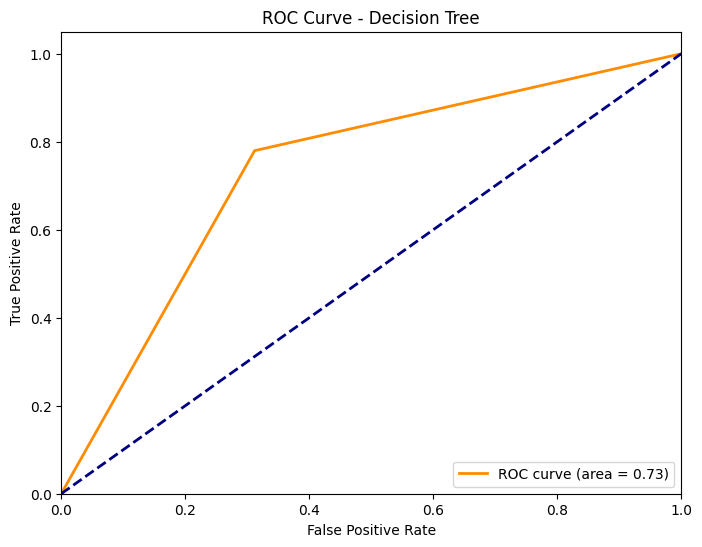

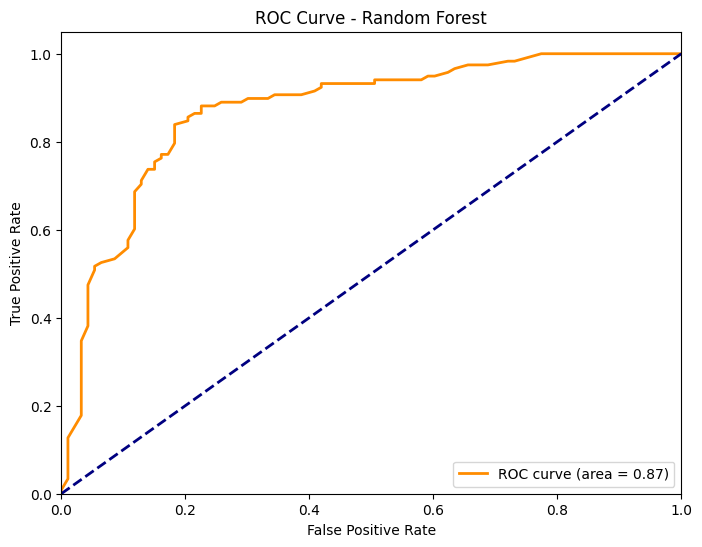

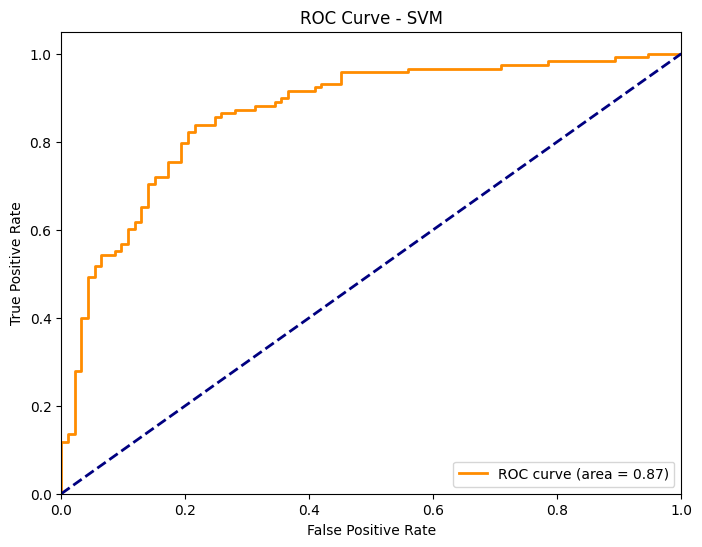

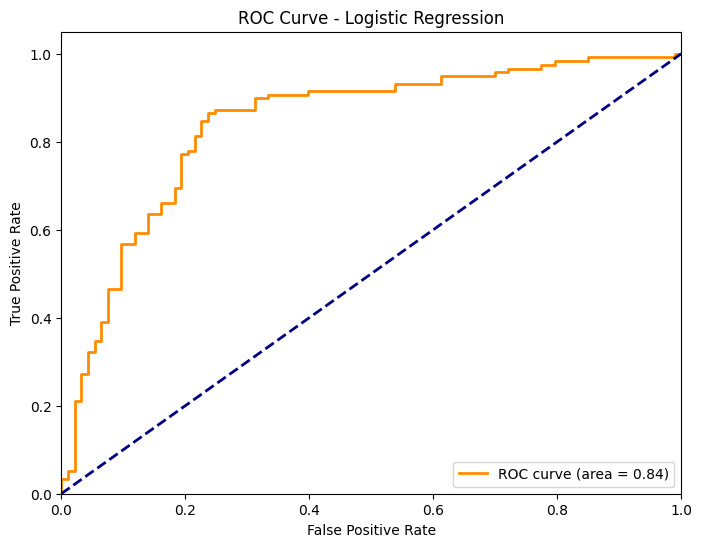

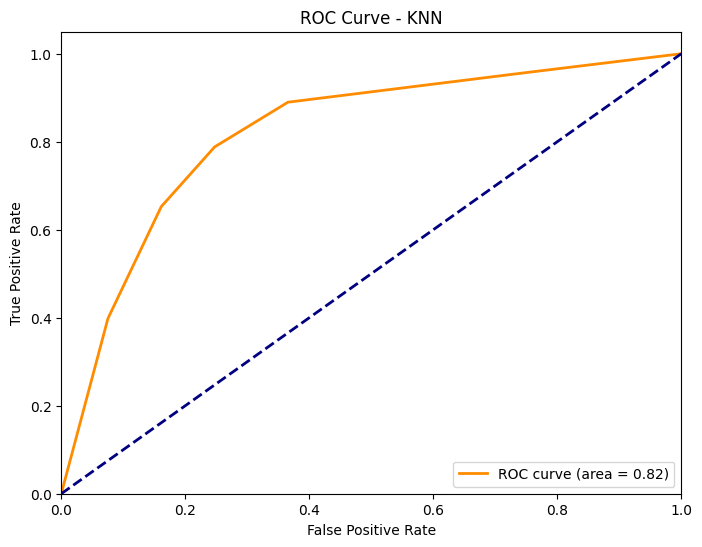

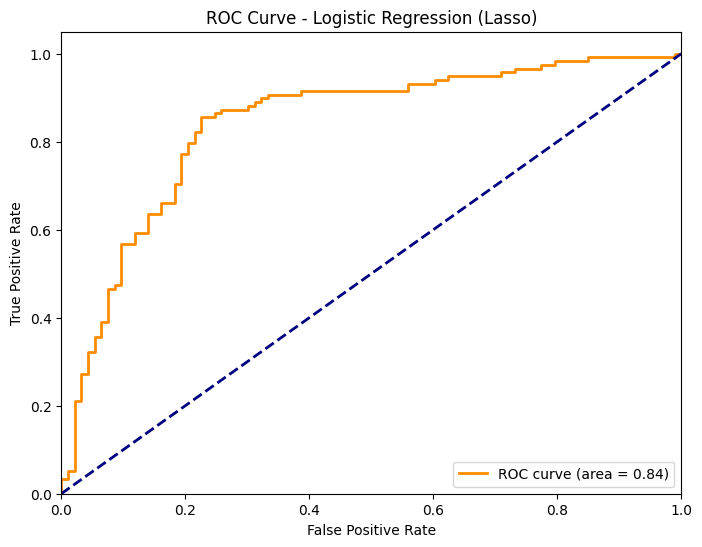

In [97]:
# Assuming models are already trained and named accordingly
models = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'SVM': svm,
    'Logistic Regression': lr,
    'KNN': knn,
    'Logistic Regression (Lasso)': logistic_reg,  # Assuming logistic_reg is the model with Lasso penalty
}

for model_name, model in models.items():
    plot_roc_curve(model, X_test, y_test, model_name)

12. انتخاب مدل

با توجه به مقادیر صحت هر مدل یکی از بهترین انتخاب‌ها مدل جنگل تصادفی با مقدار صحت 0.82 است.

همچنین precision    recall  f1-score در این مدل از بقیه مدل‌ها بیشتر است.